In [1]:
import os
import clr
import sys
from System import Array
from time import sleep
import numpy as np
from matplotlib import pyplot as plt
# sys.path.append(os.getcwd())
%matplotlib inline

# Initialize PulseBlaster instrument

In [2]:
from qcodes.instrument_drivers.spincore import PulseBlasterESRPRO
PulseBlaster = PulseBlasterESRPRO.PulseBlaster('PulseBlaster')

PulseBlaster.detect_boards()
PulseBlaster.select_board(0)
PulseBlaster.core_clock(500)

<IPython.core.display.Javascript object>

# Program PulseBlaster

In [3]:
Narb = 10
Ndigitizer = 1000
Nlow = 1000000
PulseBlaster.start_programming()
start = PulseBlaster.send_instruction(3,'continue',0,Ndigitizer)
PulseBlaster.send_instruction(6,'continue',0,Narb)
PulseBlaster.send_instruction(0, 'continue', 0, Nlow)
PulseBlaster.send_instruction(6,'continue',0,Narb)
PulseBlaster.send_instruction(0, 'branch', start, Nlow)
PulseBlaster.stop_programming()

# PulseBlaster.start()

0

# Initialize ArbStudio instrument

In [4]:
from qcodes.instrument_drivers.lecroy import ArbStudio1104
dll_path = os.path.join(os.getcwd(),'lecroy_driver\\Library\\ArbStudioSDK.dll')
ArbStudio = ArbStudio1104.ArbStudio1104('ArbStudio', dll_path,
                                       server_name=None)


# Program Arbstudio

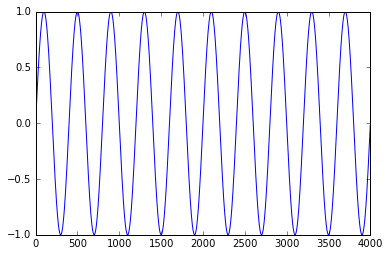

In [5]:
points = 4000
periods = 10
wave1 = np.sin(2*np.pi*np.arange(points)/points*periods)
plt.plot(wave1)

In [6]:
ArbStudio.ch1_trigger_mode('stepped')

In [7]:
ArbStudio.ch1_trigger_source('fp_trigger_in')

In [8]:
if ArbStudio.ch1_trigger_source.get_latest():
    print('has')

has


In [9]:
# Add waveforms
ArbStudio.ch1_clear_waveforms()
ArbStudio.ch1_add_waveform(wave1)
ArbStudio.ch1_add_waveform([0]*points)

#Add sequence
ArbStudio.ch1_sequence([(0,2),1])

#Load waveforms and sequence
waveforms = ArbStudio.load_waveforms()
sequences = ArbStudio.load_sequence()

In [14]:
s = sequences[0][0]
s.R

### Program PulseBlaster

In [12]:
ArbStudio.run([1])
PulseBlaster.start()

0

In [13]:
PulseBlaster.stop()
ArbStudio.stop()